In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1.각 모델별로 RMSE 취출 할 수 있게끔 진행
# 2.회귀 모델(Ridge,Lasso)의 경우 Alpah 값 변경해가며 진행
# 3.coeff, feature importance 등 확인 가능하게끔 할 것
# 4.scipy의 skew 확인 후 이상치 Data 제거해서 Data 전처리

house_df = pd.read_csv('C:/Users/sw993/OneDrive/바탕 화면/ML/house_price_train.csv')
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'],
              axis=1 , inplace=True)

In [5]:
house_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [6]:
# Object Column과 number Column을 나눠서, 
# Object -> One-Hot, number -> 정규화
X_features = house_df.drop(['SalePrice'],axis=1,inplace=False)
y_target = house_df['SalePrice']

In [7]:
cols = X_features.columns
num_cols = []
obj_cols = []
for col in cols:
    if X_features[col].dtype =='O':
        obj_cols.append(col)
    else:
        num_cols.append(col)
print('num_cols : \n',num_cols)
print('obj_cols : \n',obj_cols)

num_cols : 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
obj_cols : 
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageC

In [8]:
X_num = X_features[num_cols]
X_obj = X_features[obj_cols]

In [9]:
X_num.fillna(X_num.mean(),inplace=True)

In [10]:
X_obj_ohe = pd.get_dummies(X_obj)
X_feature = pd.concat([X_num,X_obj_ohe], axis=1)
X_feature.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
# rmse 결과값 확인 함수 with log1p & expm1
from sklearn.metrics import mean_squared_error

def get_score(y_test,pred):
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    
    return rmse, mse

In [12]:
def get_predict(model,X_train,X_test,y_train,y_test,is_expm1=False):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)  
        
    rmse, mse = get_score(y_test,pred)
    print(model.__class__.__name__)
    print('RMSE : {0:.3f} , MSE : {1:.3f}'.format(rmse,mse))

In [13]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=100)
lasso_reg = Lasso(alpha=0.01)

models = [lr_reg,ridge_reg,lasso_reg]

In [14]:
y_target_scaled = np.log1p(y_target)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feature,y_target_scaled,
                                                    test_size=0.2)
for model in models:
    get_predict(model,X_train,X_test,y_train,y_test,is_expm1=False)

LinearRegression
RMSE : 0.140 , MSE : 0.020
Ridge
RMSE : 0.141 , MSE : 0.020
Lasso
RMSE : 0.154 , MSE : 0.024


In [18]:
# 회귀 계수 값 시각화 (상위 10, 하위 10)
def get_top_bottom_coef(model):
    coef = pd.Series(model.coef_, index=X_feature.columns)
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high,coef_low
    

In [21]:
def visualize_coef(models):
    fig, axs = plt.subplots(figsize=(24,10),nrows=1,ncols=3)
    fig.tight_layout()
    for i, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        axs[i].set_title(model.__class__.__name__+'Coef',size=25)
        axs[i].tick_params(axis='y',direction='in',pad=-120)
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index,ax=axs[i])

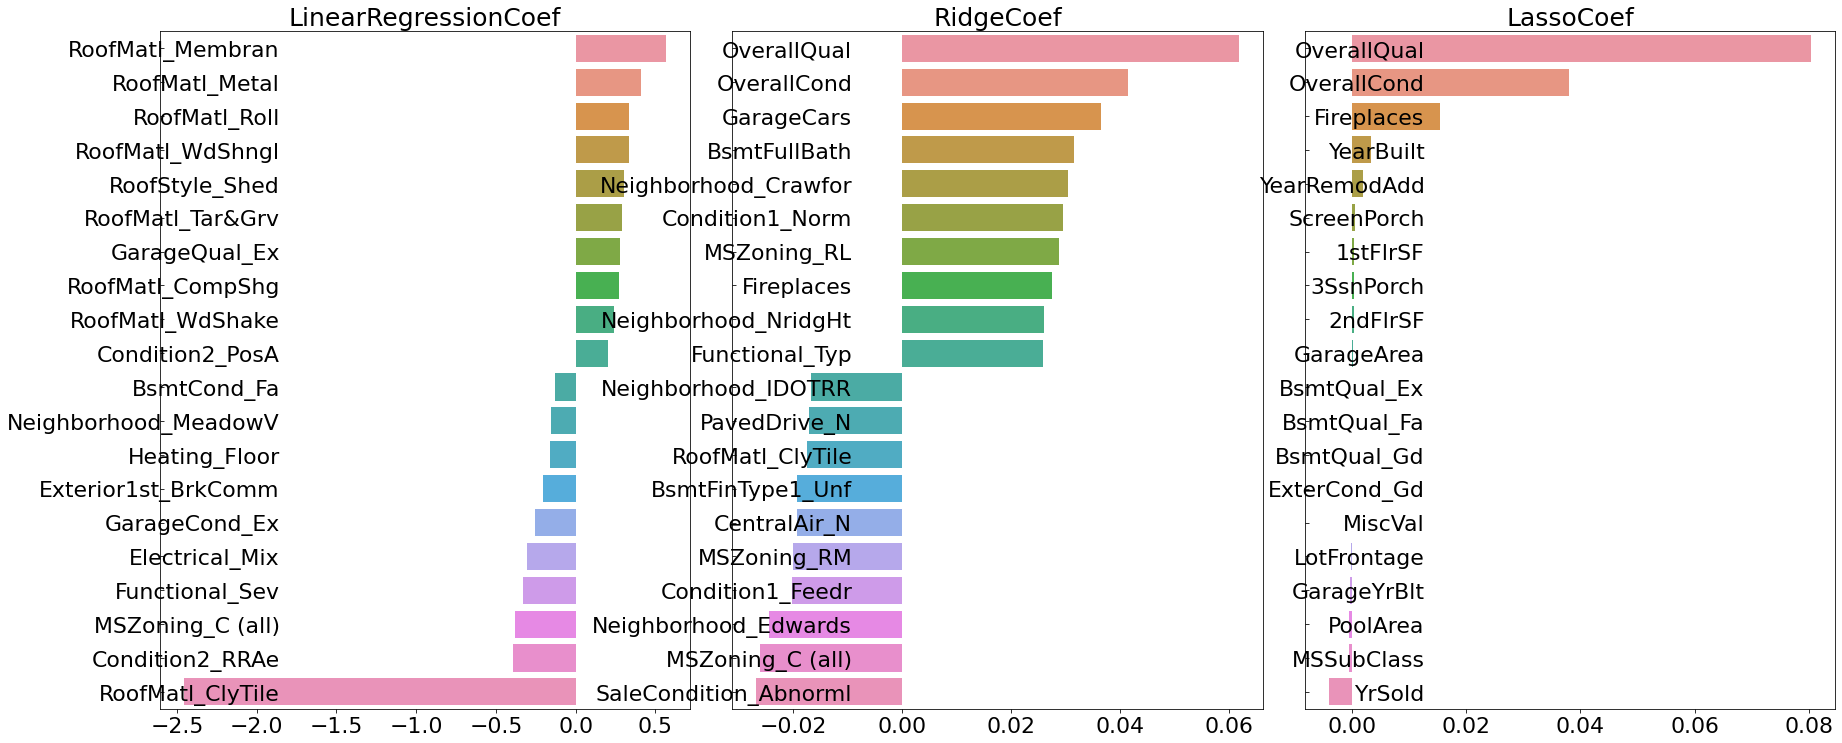

In [22]:
visualize_coef(models)

In [24]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model,X_feature,y_target_scaled,
                                            scoring='neg_mean_squared_error',
                                            cv=5))
        rmse_avg = rmse_list.mean()
        print(model.__class__.__name__)
        print(rmse_list)
        print(rmse_avg)

In [25]:
get_avg_rmse_cv(models)

LinearRegression
[1.35323121e-01 3.44390541e+03 1.67650998e-01 1.10896767e-01
 1.98081150e-01]
688.9034727366545
Ridge
[0.11781713 0.15293403 0.13139259 0.11927624 0.19635894]
0.14355578419578258
Lasso
[0.13210981 0.16865314 0.14360998 0.13175884 0.21760038]
0.15874643121035362


In [31]:

from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model,param_grid=params,
                             scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X_feature,y_target_scaled)
    rmse = np.sqrt(-grid_model.best_score_)
    
    print(model.__class__.__name__)
    print(rmse)
    print(grid_model.best_params_)
    return grid_model.best_estimator_


ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)


Ridge
0.14176729913304337
{'alpha': 12}
Lasso
0.14198359088571505
{'alpha': 0.001}


LinearRegression
RMSE : 0.140 , MSE : 0.020
Ridge
RMSE : 0.138 , MSE : 0.019
Lasso
RMSE : 0.137 , MSE : 0.019


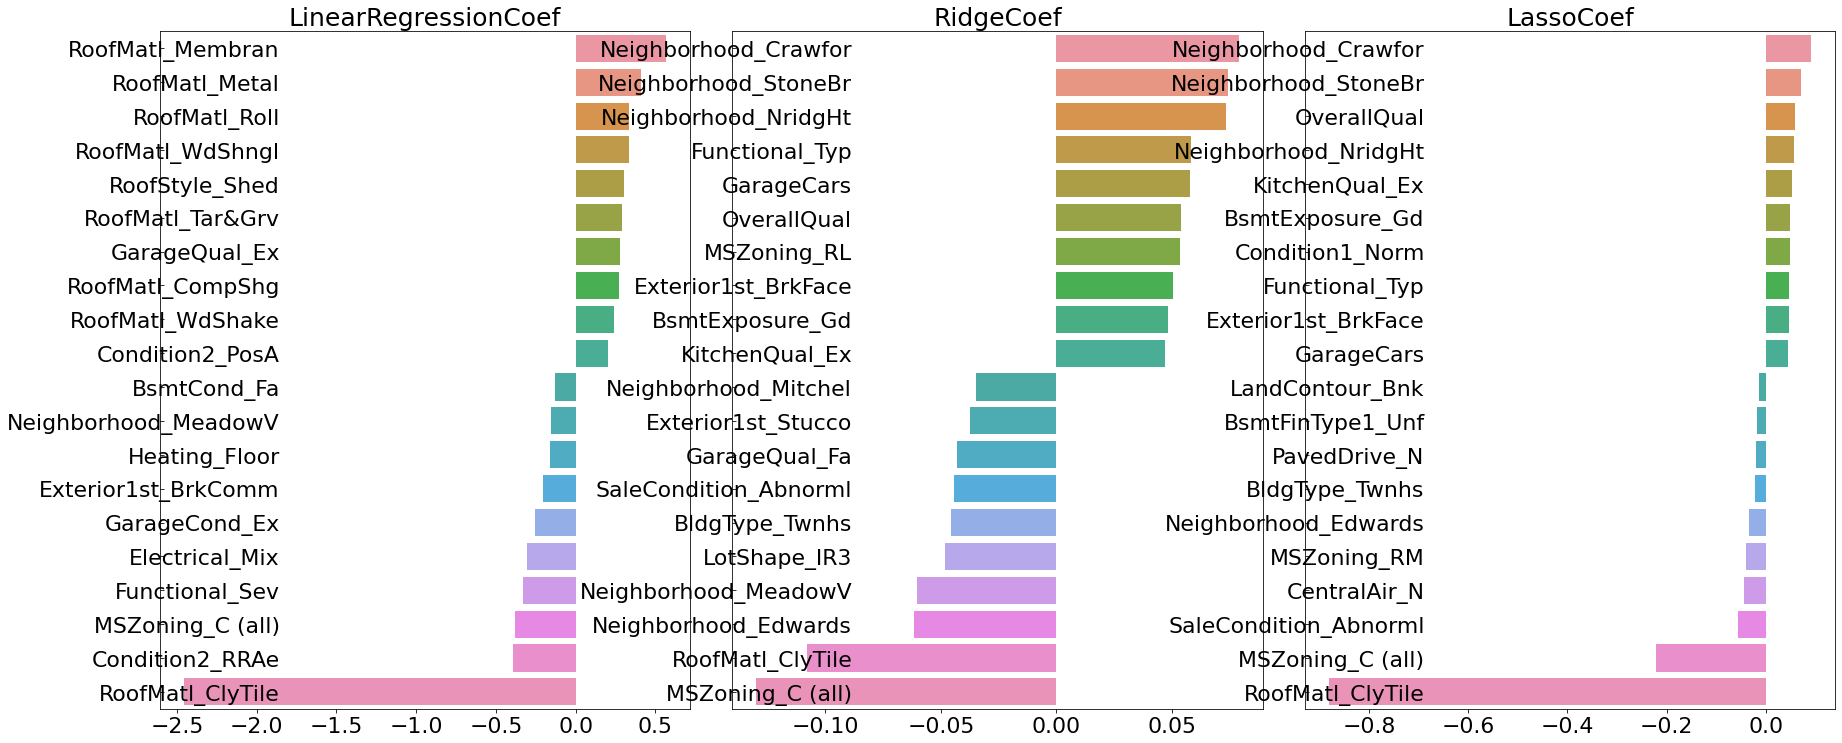

In [36]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=12)
lasso_reg = Lasso(alpha=0.001)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
for model in models:
    get_predict(model,X_train,X_test,y_train,y_test,is_expm1=False)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coef(models)